# Previsão do Campeão do Campeonato Brasileiro Série A 2023
---
**Projeto desenvolvido por:**
- Davi Bassi Cardoso Barbosa (RA: 125111374594)<br>
- Diogo Leme Jacomini (RA: 125111343738)<br>
- Kleyton Santos Rodrigues de Sousa (RA: 125111363067)<br>
- Marcelo Gomes de Souza Pereira (RA: 125111368169)<br>
---
Modelo de previsão para determinar o possível campeão do Campeonato Brasileiro Série A de 2023. O modelo utilizará dados históricos das equipes participantes nas temporadas anteriores, bem como estatísticas da atual temporada, para fazer a previsão.

O Campeonato Brasileiro Série A é uma das competições de futebol mais populares e competitivas do Brasil. Neste projeto, iremos explorar os dados, analisar seu desempenho ao longo da temporada e desenvolver um modelo de previsão para determinar qual equipe tem maior probabilidade de se tornar <b>campeão</b>!
<br>

#### Descrição das Variáveis
- <b>pos</b>: A posição da equipe na tabela de classificação.<br>
- <b>team</b>: O nome da equipe.<br>
- <b>round</b>: O número da rodada do campeonato em que o jogo ocorreu.<br>
- <b>win</b>: O número de partidas vencidas pela equipe.<br>
- <b>draw</b>: O número de partidas empatadas pela equipe.<br>
- <b>lost</b>: O número de partidas perdidas pela equipe.<br>
- <b>goals</b>: O número de gols marcados pela equipe ao longo da temporada.<br>
- <b>goals_against</b>: O número de gols sofridos pela equipe ao longo da temporada.<br>
- <b>goals_diff</b>: A diferença entre gols marcados e gols sofridos pela equipe.<br>
- <b>points</b>: O total de pontos conquistados pela equipe.<br>
- <b>season</b>: A temporada do campeonato<br>

##### Variaveis Criadas:
Essas variáveis são adicionais com base nos dados brutos.
- <b>ultima_rodada</b>: Indica a última rodada de cada temporada.<br>
- <b>campeao</b>: Indica se um time foi campeão em determinada temporada.<br>
- <b>z4_1_anos</b>: Indica se um time foi rebaixado para serie B em sua ultima temporada na serie A.<br>
- <b>z4_2_anos</b>: Indica se um time esteve no Z4 (zona de rebaixamento) em anos 2.<br>
- <b>z4_3_anos</b>: Indica se um time esteve no Z4 (zona de rebaixamento) em anos 3.<br>


#### Classes:
* `WorldFootball()`
Classe responsável por extrair dados do site "worldfootball.net", transformar esses dados em um formato adequado e carregar os dados processados em arquivos CSV.
Os métodos extract(), transform() e load() são chamados pelo método run(), que executa todo o processo de ETL (Extração, Transformação e Carregamento) de dados. Os dados extraídos são salvos em arquivos CSV no caminho base fornecido.

#### Bibliotecas necessárias:
- <b>pandas</b>: Biblioteca utilizada para manipulação e análise de dados.<br>
- <b>joblib</b>: Biblioteca para salvar e carregar objetos Python (como modelos treinados) em disco.<br>
- <b>lxml</b>: Biblioteca para processamento de XML e HTML.<br>
- <b>requests</b>: Biblioteca para fazer requisições HTTP.<br>
- <b>matplotlib</b>: Biblioteca para criação de gráficos e visualizações de dados.<br>
- <b>seaborn</b>: Biblioteca baseada no Matplotlib que oferece uma interface de alto nível para criação de gráficos estatísticos atraentes.
- <b>sklearn</b>: Oferece uma ampla gama de algoritmos e ferramentas para tarefas como classificação, regressão, agrupamento e pré-processamento de dados.

In [1]:
features = ['vitoria', 'empate', 'derrota', 'gols', 'gols_sofridos', 'diferenca_gols', 'pontos']
target = 'posicao'

# !! Caso ocorram alterações nos dados, lembre-se de definir as variáveis como 'None' para indicar que elas precisam ser recalculadas."
best_params = {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}

In [2]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random
import os
from utils import WorldFootball
from utils.functions import (get_ultima_rodada,
                            get_campeao,
                            get_rebaixamento, 
                            get_xy, )

In [3]:
# settings
base_path = os.path.dirname(os.path.abspath(__name__))
plt.rcParams['figure.figsize'] = (20, 3)
plt.style.use('ggplot')
pd.set_option("display.max_columns", None)

### Fluxo ETL
!!! Atenção, caso você já tenha o arquivo ´`df_curated.csv`´  NÃO É NECESSÁRIO RODAR O ETL !!!


In [4]:
# etl = WorldFootball(base_path=base_path)
# #etl.extract(ultima_temporada=27, save=True)
# etl.transform(input='env')
# etl.load(input='env')

#### Coleta de dados (extract)
A função `extract` é responsável por extrair os dados brutos de partidas de futebol de temporadas anteriores no site www.worldfootball.net. Ela realiza as seguintes etapas:

1. **Definição da última temporada**: A função recebe um parâmetro opcional `ultima_temporada`, que indica o número de temporadas anteriores a serem extraídas.

2. **Loop de extração**: A função itera sobre cada temporada, a partir da temporada atual. Para cada temporada, a função itera sobre as rodadas de 1 a 38.

3. **Obtenção dos dados brutos**: A função constrói a URL específica para cada combinação de temporada e rodada e realiza uma solicitação GET para obter os dados brutos da página.

4. **Extração dos dados tabulares**: A função `read_html` é utilizada para extrair as tabelas HTML presentes na página.

5. **Criação de DataFrame com variável de temporada**: Uma coluna adicional chamada 'temporada' é adicionada a esse DataFrame, contendo o número da temporada respectativa.

6. **Armazenamento dos dados brutos**: Opcionalmente, se o parâmetro `save` for definido como `True`, o DataFrame também é salvo em um arquivo CSV com o nome "df_{temporada}_{rodada}.csv". O arquivo é salvo no diretório `data/raw`.


#### Limpeza e Tratamento de Dados (transform)
A função `transform` realiza a transformação dos dados, aplicando limpezas e tratamentos necessários. 

Etapas realizadas pela função:

1. **Remoção da coluna 'Team'**: Para cada conjunto de dados, é realizada a remoção da coluna denominada 'Team', que contém valores nulos, onde armazenava o escuto de cada time.

2. **Renomeação de colunas**: 
    * A coluna com o rótulo '#' é renomeada para 'posicao';
    * A coluna 'Team.1' é renomeada para 'time';
    * A coluna 'M.' é renomeada para 'rodada';
    * A coluna 'W' é renomeada para 'vitoria';
    * A coluna 'D' é renomeada para 'empate';
    * A coluna 'L' é renomeada para 'derrota'
    * A coluna 'goals' é renomeada para 'gols',
    * A coluna 'Dif.' é renomeada para 'diferenca_gols'
    * A coluna 'Pt.' é renomeada para 'pontos'.

3. **Separação da coluna 'gols'**: A coluna 'gols' é uma string no formato 'gols_marcados:gols_sofridos'. A função utiliza o método `str.split` para separar essa coluna em duas colunas distintas: 'gols' e 'gols_sofridos'.

4. **Conversão para tipo numérico**: A função aplica o método `to_numeric` nos dados, convertendo as colunas para o tipo de dados.

5. **Poisicao da tabela**: A coluna 'posicao' é atualizada para os valores incrementados em 1, obtendo a posição correta de cada equipe.

6. **Reorganização das colunas**: A função reorganiza as colunas dos conjuntos de dados.

7. **Armazenamento dos dados processados**: Cada conjunto de dados processado é adicionado à lista `datasets_processed`. Além disso, o conjunto de dados é salvo em um arquivo CSV, utilizando informações da temporada e rodada presentes nos dados. O arquivo é nomeado como "df_processed_temporada_rodada.csv" e é salvo no diretório `data/processed`.


#### Carregando os conjuntos de dados (load)
A função `load` é responsável por carregar os conjuntos de dados. Ela realiza as seguintes etapas:

1. **Verificação do tipo de entrada**: A função recebe um parâmetro opcional `input`, que indica o formato dos dados de entrada. Se o valor de `input` for igual a `'csv'` ou se o atributo `datasets_processed` estiver vazio, a função prossegue com a leitura dos arquivos CSV presentes no diretório `data/processed`. Caso contrário, a função utiliza os conjuntos de dados já existentes em `datasets_processed`.

2. **Leitura dos arquivos CSV**: Se a entrada for do tipo `'csv'` ou se `datasets_processed` estiver vazio, a função lê cada arquivo CSV encontrado no diretório `data/processed`.

3. **Concatenação dos conjuntos de dados**: A função utiliza o método `concat` para concatenar todos os conjuntos de dados presentes.

4. **Salvamento dos dados curados**: O conjunto de dados `dataset_curated` é salvo em um arquivo CSV chamado "df_curated.csv". O arquivo é salvo no diretório `data/curated` usando o método `to_csv`.

In [5]:
data = pd.read_csv(os.path.join(base_path, 'data', 'curated', 'df_curated.csv'))

In [6]:
data.head(10)

,posicao,time,rodada,vitoria,empate,derrota,gols,gols_sofridos,diferenca_gols,pontos,temporada
0,1,Cruzeiro,10,6,3,1,27,14,13,21,2003
1,2,Santos FC,10,5,3,2,17,9,8,18,2003
2,3,São Paulo FC,10,5,3,2,22,19,3,18,2003
3,4,Atlético Mineiro,10,5,2,3,19,13,6,17,2003
4,5,Internacional,10,5,2,3,14,12,2,17,2003
5,6,Corinthians SP,10,4,4,2,22,14,8,16,2003
6,7,Guarani - SP,10,4,3,3,17,13,4,15,2003
7,8,Paraná Clube,10,4,3,3,16,13,3,15,2003
8,9,Vitória - BA,10,4,3,3,13,14,-1,15,2003
9,10,Athletico Paranaense,10,4,2,4,18,16,2,14,2003


### Criando Novas Variaveis
Essas novas variáveis foram criadas para fornecer informações adicionais e relevantes sobre os dados do campeonato, permitindo análises mais detalhadas e abrangentes.  Elas ajudam a enriquecer a compreensão dos dados e a obter informações relevantes para tomada de decisões.

In [7]:
# ultima_rodada = Indica a última rodada de cada temporada.
data = get_ultima_rodada(data)

# campeao = Indica se um time foi campeão em determinada temporada.
data = get_campeao(data)

# z4_1_anos, z4_2_anos, z4_3_anos = Indica se um time esteve no Z4 (zona de rebaixamento) no periodo designado.
data = get_rebaixamento(data)

# dropar as posições maiores que 20.
data = data.drop(data[data['posicao'] > 20].index)

### Análise Exploratória Inicial
Nesta seção, faremos uma análise exploratória inicial dos dados do Campeonato Brasileiro Série A.

In [8]:
# Dados da ultima rodada
df = data[data['rodada'] == data['ultima_rodada']]

# times no dataset
times = data.time.drop_duplicates().sort_values().to_list()

Flamengo, Santos e São Paulo estão na Serie A em 27 temporadas.


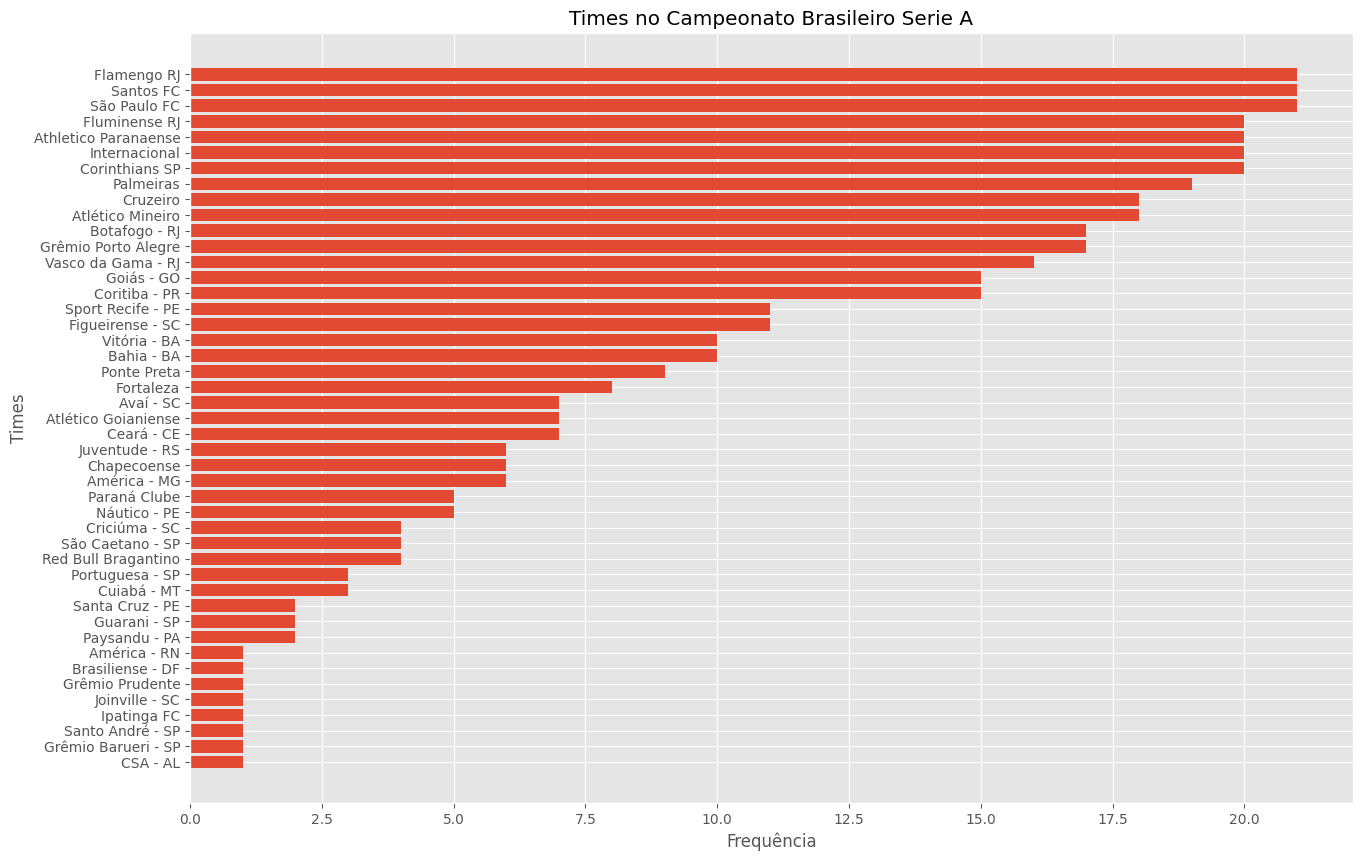

In [9]:
counts = df['time'].value_counts().sort_values(ascending=True).to_frame().reset_index().rename(columns={'count':'qtd'}).copy()

print('Flamengo, Santos e São Paulo estão na Serie A em 27 temporadas.')
plt.figure(figsize=(15, 10))
plt.barh(counts[counts.columns[0]], counts[counts.columns[1]])
plt.xlabel('Frequência')
plt.ylabel('Times')
plt.title('Times no Campeonato Brasileiro Serie A')
plt.show()

Temporadas: 2003 - 2023
Os são a partir de 2003, ano que começou a ser disputado por pontos corridos.


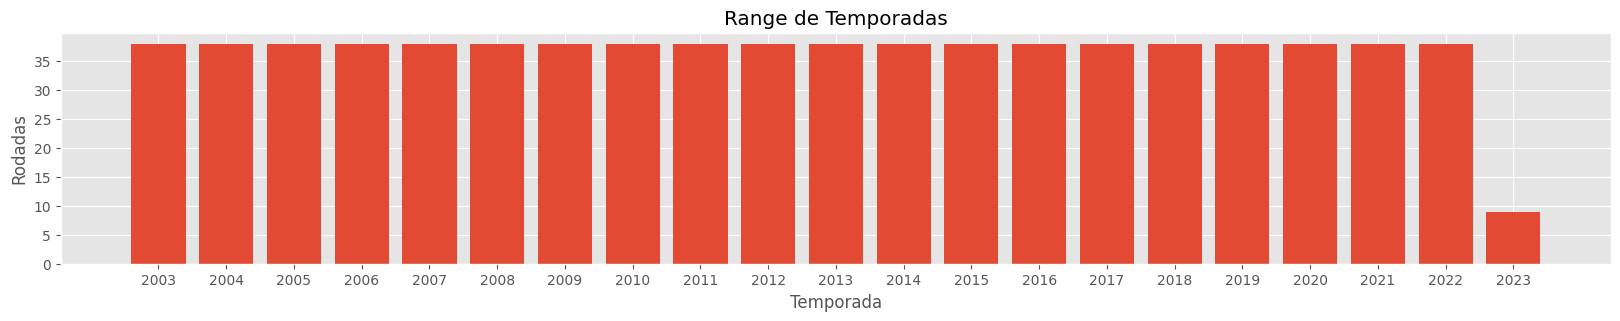

In [10]:
temporadas = data[['temporada', 'rodada']].drop_duplicates().groupby('temporada', as_index=False)['rodada'].max()
print(f"Temporadas: {data['temporada'].min()} - {data['temporada'].max()}")
print('Os são a partir de 2003, ano que começou a ser disputado por pontos corridos.')

# Criar o gráfico
plt.bar(temporadas.temporada, temporadas.rodada, align='center')
plt.xticks(temporadas.temporada)
plt.xlabel('Temporada')
plt.ylabel('Rodadas')
plt.title('Range de Temporadas')
plt.show()

In [11]:
df.groupby('temporada').agg({'pontos': ['mean', 'max', 'min', 'sum'],
                             'vitorias': ['mean', 'max', 'min', 'sum'],
                             'gols': ['mean', 'max', 'min', 'sum']})

pontos                  vitoria                    gols          \
                mean max min   sum       mean max min  sum       mean max min   
temporada                                                                       
2003       54.600000  76  40  1092  14.800000  23  10  296  55.950000  78  40   
2004       53.550000  69  41  1071  15.100000  21   9  302  54.150000  83  34   
2005       54.150000  77  38  1083  15.050000  23   9  301  60.350000  81  45   
2006       52.150000  78  28  1043  14.150000  22   7  283  51.500000  66  37   
2007       52.500000  77  17  1050  14.500000  23   4  290  52.350000  73  24   
2008       52.200000  75  35  1044  14.200000  21   9  284  51.750000  67  37   
2009       51.900000  67  31  1038  13.900000  19   7  278  54.700000  67  42   
2010       51.100000  71  31  1022  13.100000  20   7  262  48.900000  68  33   
2011       51.750000  71  31  1035  13.750000  21   7  275  50.850000  60  38   
2012       51.750000  77  30  1035  13.750000  22   7  275  47.000000  64  37   
2013       51.200000  76  20  1024  13.600000  23   5  272  46.800000  77  22   
2014       52.400000  80  32  1048  14.400000  24   7  288  43.000000  67  28   
2015       52.450000  81  31  1049  14.450000  24   7  289  44.850000  71  26   
2016       51.611111  80  28   929  14.166667  24   7  255  44.555556  62  23   
2017       51.850000  72  36  1037  13.850000  21   9  277  46.150000  61  29   
2018       51.500000  80  23  1030  13.500000  23   4  270  41.350000  64  18   
2019       52.100000  90  20  1042  14.100000  28   3  282  43.800000  86  18   
2020       51.600000  71  27  1032  13.600000  21   5  272  47.200000  68  31   
2021       51.350000  84  15  1027  13.350000  26   1  267  42.100000  69  24   
2022       51.600000  81  22  1032  13.600000  23   3  272  45.250000  66  29   
2023       12.450000  21   3   249   3.450000   7   0   69  11.750000  20   7   

                 
            sum  
temporada        
2003       1119  
2004       1083  
2005       1207  
2006       1030  
2007       1047  
2008       1035  
2009       1094  
2010        978  
2011       1017  
2012        940  
2013        936  
2014        860  
2015        897  
2016        802  
2017        923  
2018        827  
2019        876  
2020        944  
2021        842  
2022        905  
2023        235

### Análise de Dados
Nesta seção, faremos uma análise do Campeonato Brasileiro Série A. Vamos examinar as informações disponíveis e realizar algumas visualizações para obter insights sobre os dados.

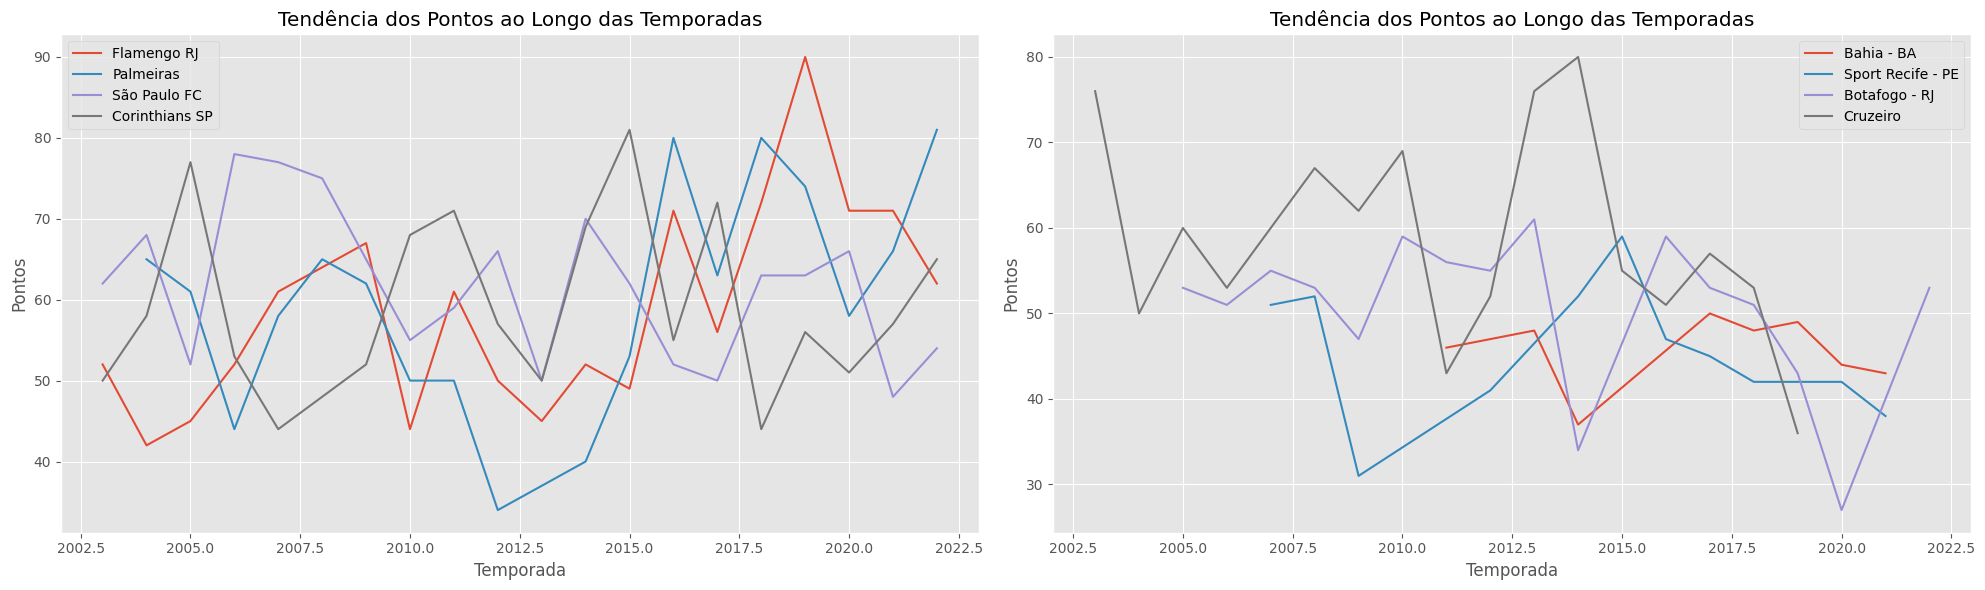

In [12]:
# Visualizar a tendência dos pontos ao longo das temporadas para alguns times selecionados
df_grouped = df[df['temporada'] != 2023].groupby(['time', 'temporada']).agg({'pontos': 'sum'}).reset_index()
times_selecionados = ['Flamengo RJ', 'Palmeiras', 'São Paulo FC', 'Corinthians SP']
df_times_selecionados = df_grouped[df_grouped['time'].isin(times_selecionados)]

# Primeiro gráfico
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
for time in times_selecionados:
    df_time = df_times_selecionados[df_times_selecionados['time'] == time]
    plt.plot(df_time['temporada'], df_time['pontos'], label=time)
plt.xlabel('Temporada')
plt.ylabel('Pontos')
plt.title('Tendência dos Pontos ao Longo das Temporadas')
plt.legend()

# Segundo gráfico
plt.subplot(1, 2, 2)
random.shuffle(times)
times_selecionados_aleatorio = times[:4]
df_times_selecionados_aleatorio = df_grouped[df_grouped['time'].isin(times_selecionados_aleatorio)]

for time in times_selecionados_aleatorio:
    df_time = df_times_selecionados_aleatorio[df_times_selecionados_aleatorio['time'] == time]
    plt.plot(df_time['temporada'], df_time['pontos'], label=time)
plt.xlabel('Temporada')
plt.ylabel('Pontos')
plt.title('Tendência dos Pontos ao Longo das Temporadas')
plt.legend()

plt.tight_layout()
plt.show()



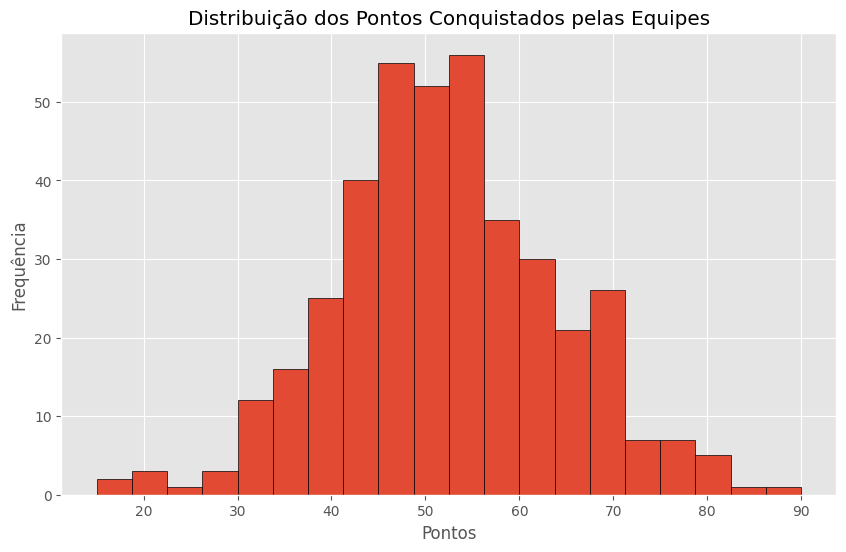

In [13]:
# Distribuição dos pontos conquistados pelas equipes
plt.figure(figsize=(10, 6))
plt.hist(df_grouped['pontos'], bins=20, edgecolor='k')
plt.xlabel('Pontos')
plt.ylabel('Frequência')
plt.title('Distribuição dos Pontos Conquistados pelas Equipes')
plt.show()

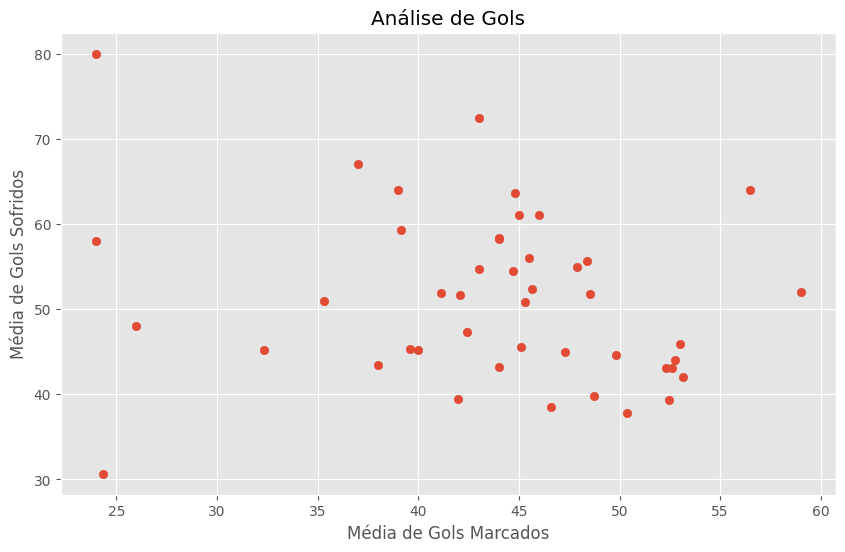

In [14]:
# Média de gols marcados e sofridos por equipe
media_gols_marcados = df.groupby('time')['gols'].mean()
media_gols_sofridos = df.groupby('time')['gols_sofridos'].mean()

# Gráfico de dispersão dos gols marcados e sofridos por equipe
plt.figure(figsize=(10, 6))
plt.scatter(media_gols_marcados, media_gols_sofridos)
plt.xlabel('Média de Gols Marcados')
plt.ylabel('Média de Gols Sofridos')
plt.title('Análise de Gols')
plt.show()

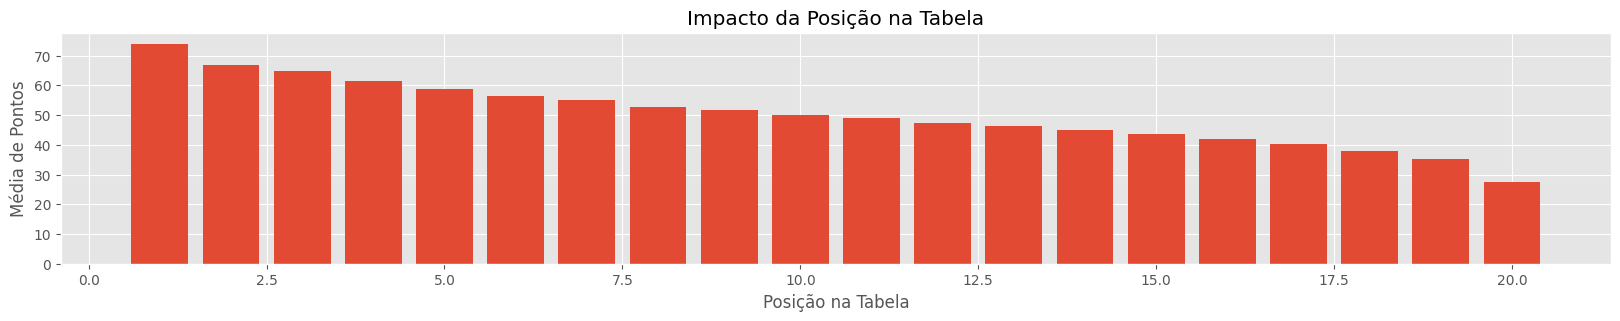

In [15]:
# Média de pontos por posição na tabela
media_pontos_posicao = df.groupby('posicao')['pontos'].mean()

# Gráfico de barras mostrando a média de pontos por posição na tabela
plt.bar(media_pontos_posicao.index, media_pontos_posicao.values)
plt.xlabel('Posição na Tabela')
plt.ylabel('Média de Pontos')
plt.title('Impacto da Posição na Tabela')
plt.show()

In [16]:
# Estatísticas dos campeões por temporada
estatisticas_campeoes = df.query('campeao == 1').groupby('temporada').agg({'pontos': ['max'], 'gols': 'sum'})

# Exibindo as estatísticas dos campeões
print(estatisticas_campeoes)

          pontos gols
             max  sum
temporada            
2003          76   78
2004          69   83
2005          77   81
2006          78   66
2007          77   55
2008          75   66
2009          67   58
2010          71   62
2011          71   53
2012          77   61
2013          76   77
2014          80   67
2015          81   71
2016          80   62
2017          72   50
2018          80   64
2019          90   86
2020          71   68
2021          84   67
2022          81   66


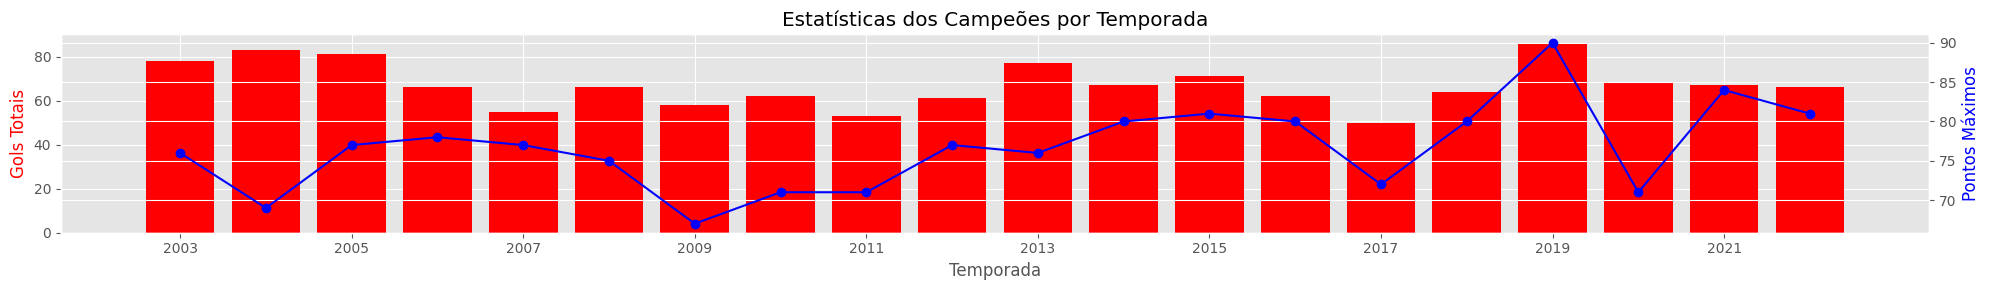

In [37]:
# Estatísticas dos campeões por temporada
estatisticas_campeoes = df.query('campeao == 1').groupby('temporada').agg({'pontos': ['max'], 'gols': 'sum'}).copy()

# Extraindo os valores para o gráfico
temporadas = estatisticas_campeoes.index
pontos_maximos = estatisticas_campeoes[('pontos', 'max')]
gols_totais = estatisticas_campeoes[('gols', 'sum')]

# Criando o gráfico de barras
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()  # Criando um eixo secundário para a linha

# Plotando as barras de gols
ax1.bar(temporadas, gols_totais, label='Gols Totais', color='red')

# Plotando a linha de pontos
ax2.plot(temporadas, pontos_maximos, label='Pontos Máximos', color='blue', marker='o')

# Definindo as legendas
ax1.set_xlabel('Temporada')
ax1.set_ylabel('Gols Totais', color='red')
ax2.set_ylabel('Pontos Máximos', color='blue')
ax1.set_title('Estatísticas dos Campeões por Temporada')

# Ajustando as temporadas
ax1.set_xticks(temporadas[::2])
ax1.set_xticklabels(temporadas[::2])

# Configurando o espaçamento
fig.tight_layout()

# Exibindo o gráfico
plt.show()

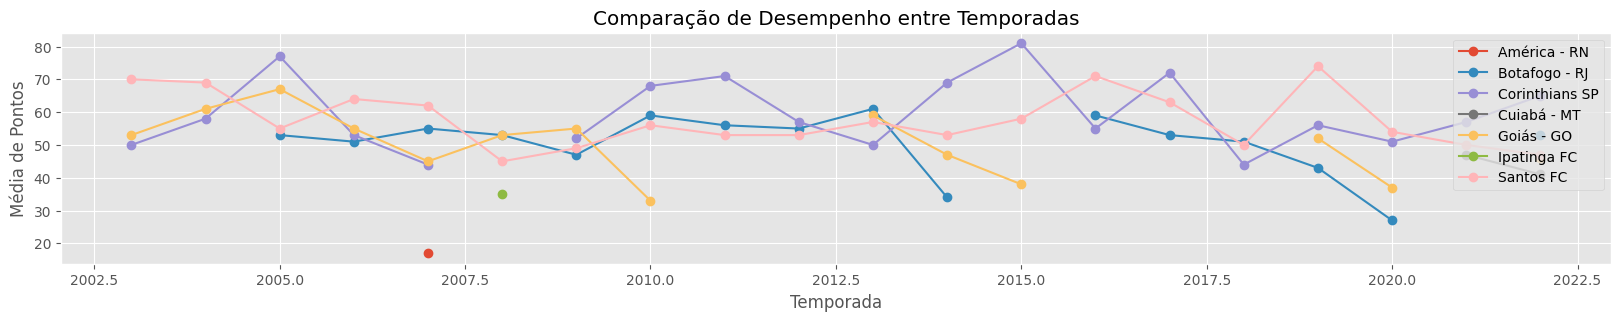

In [18]:
# Média de pontos por temporada para cada equipe
random.shuffle(times)
times_red = times[:7]
media_pontos_temporada_equipe = df[df['time'].isin(times_red)].query("temporada != 2023").groupby(['temporada', 'time'])['pontos'].mean().unstack()

# Gráfico de linha comparando o desempenho das equipes ao longo das temporadas
media_pontos_temporada_equipe.plot(marker='o')
plt.xlabel('Temporada')
plt.ylabel('Média de Pontos')
plt.title('Comparação de Desempenho entre Temporadas')
plt.legend(loc='upper right')
plt.show()

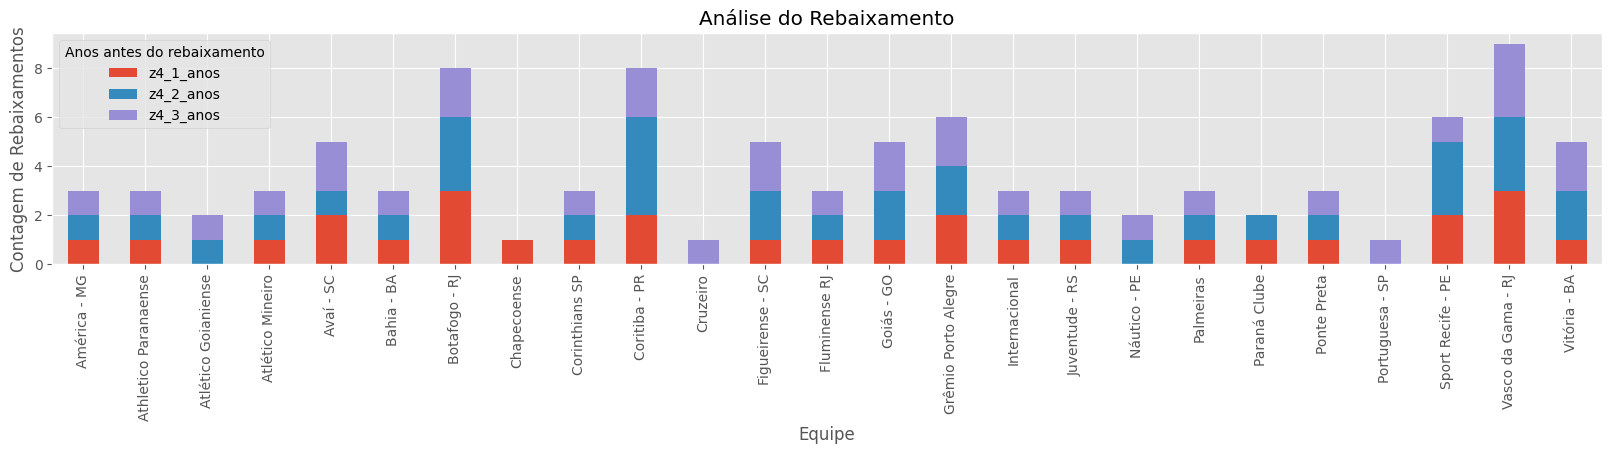

In [19]:
# Contagem de vezes em que cada equipe ficou na zona de rebaixamento
contagem_rebaixamento = df.groupby('time')[['z4_1_anos', 'z4_2_anos', 'z4_3_anos']].sum()
# Verifique se todas as colunas 'z4' são iguais a zero
mask = (contagem_rebaixamento[['z4_1_anos', 'z4_2_anos', 'z4_3_anos']] != 0).any(axis=1)
contagem_rebaixamento = contagem_rebaixamento[mask]

# Gráfico de barras mostrando a contagem de rebaixamentos por equipe
contagem_rebaixamento.plot(kind='bar', stacked=True)
plt.xlabel('Equipe')
plt.ylabel('Contagem de Rebaixamentos')
plt.title('Análise do Rebaixamento')
plt.legend(title='Anos antes do rebaixamento')
plt.show()

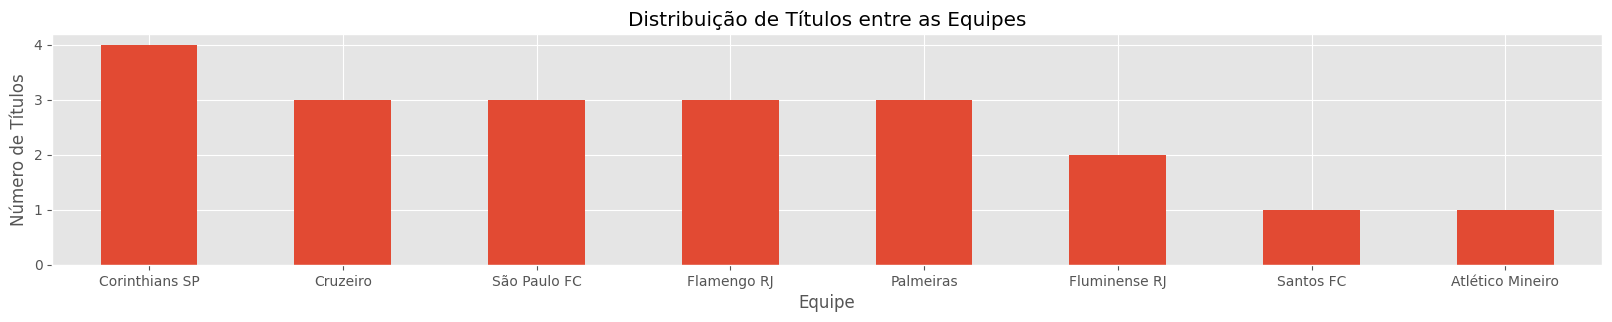

In [20]:
# Contagem de títulos por equipe
contagem_titulos = df.query('campeao == 1')['time'].value_counts()

# Gráfico de barras mostrando a distribuição de títulos entre as equipes
contagem_titulos.plot(kind='bar')
plt.xlabel('Equipe')
plt.ylabel('Número de Títulos')
plt.title('Distribuição de Títulos entre as Equipes')
plt.xticks(rotation=0)
plt.show()

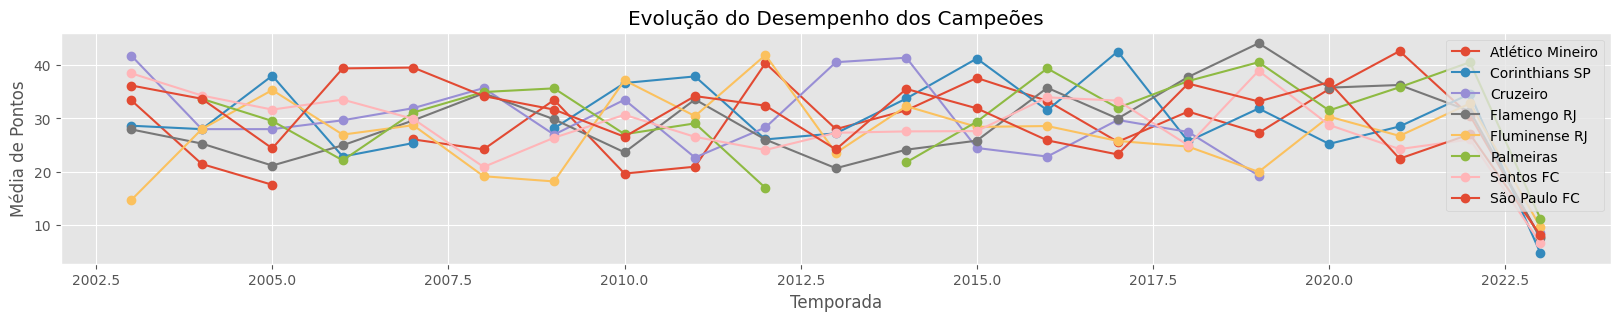

In [21]:
# Média de pontos por temporada para os campeões
media_pontos_temporada_campeoes = data[data['time'].isin(data[data['rodada'] == data['ultima_rodada']].query('campeao == 1')['time'])].groupby(['temporada', 'time'])['pontos'].mean().unstack()

# Gráfico de linha mostrando a evolução do desempenho dos campeões ao longo das temporadas
media_pontos_temporada_campeoes.plot(marker='o')
plt.xlabel('Temporada')
plt.ylabel('Média de Pontos')
plt.title('Evolução do Desempenho dos Campeões')
plt.legend(loc='upper right')
plt.show()

### Machine Learning
Nesta seção, é criado um modelo de Machine Learning para prever a classificação final de cada equipe no Campeonato Brasileiro Série A.

#### Padronizacao nos dados para o Modelo
todoÇ expain

In [22]:
current_season_data = data.query('temporada == 2023')
dataset = data.query("temporada != 2023")

In [23]:
# Divindo os dados de treino e teste por temporada aleatoriamente
temporadas = dataset.temporada.drop_duplicates().to_list()
random.seed(127)
random.shuffle(temporadas)

seasons_test = temporadas[:int(0.3 * len(temporadas))]  # 30% teste
seasons_train = temporadas[len(seasons_test):]  # 70% treino

# get_xy - Separa o DataFrame em matrizes X e y com base nos valores de temporada, features e target especificados.
X_train, y_train = get_xy(data, seasons_train, features, target)
X_test, y_test = get_xy(data, seasons_test, features, target)

#### Melhores Parametros
GridSearchCV é uma técnica de busca exaustiva que permite encontrar a melhor combinação de hiperparâmetros para o modelo. Ele automatiza o processo de ajuste de hiperparâmetros, testando diferentes combinações e avaliando o desempenho do modelo em cada combinação. <br>
!! É um processo que demenda tempo, inicial testamos com 144 combinações e levou aproximadamente 11 minutos para encontrar a melhor combinacao. !!

In [24]:
model = RandomForestClassifier()

# !! Caso ocorram alterações nos dados, lembre-se de definir as variáveis como 'None' para indicar que elas precisam ser recalculadas."
if best_params is None:
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 5, 10, 2],
        'min_samples_split': [2, 5, 10, 1],
        'min_samples_leaf': [1, 2, 4]
    }

    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X_train, y_train)

    # Obter os melhores parâmetros encontrados
    best_params = grid_search.best_params_

print("Melhores Parâmetros:")
print(best_params)

Melhores Parâmetros:
{'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}


#### Criando e treinamento o Modelo
O RandomForestClassifier é um algoritmo baseado em ensemble que combina várias árvores de decisão para tarefas de classificação. O algoritmo cria uma coleção de árvores de decisão treinadas em amostras aleatórias e combina suas previsões por votação.

In [25]:
# Criar o modelo Random Forest com os melhores parâmetros
best_model = RandomForestClassifier(**best_params)
best_model.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=4, n_estimators=300)

#### Cross-validation
Técnica de avaliação de desempenho de modelos. Ele divide o conjunto de dados em partes menores chamadas "folds" e treina o modelo em alguns folds enquanto avalia outros. Isso ajuda a estimar o desempenho do modelo em dados não vistos e evitar problemas de overfitting ou desempenho ruim.

In [26]:
cv_scores = cross_val_score(best_model, X_train, y_train, cv=10)
print(f"Acurácia do Cross-Validation: {cv_scores.mean()}")

Acurácia do Cross-Validation: 0.2644339622641509


### Avaliando o Modelo

In [27]:
# Fazer as previsões
predictions = best_model.predict(X_test)

In [28]:
# Calcular a acurácia do modelo
accuracy = accuracy_score(y_test, predictions)
print(f'Acurácia do modelo: {accuracy}')

Acurácia do modelo: 0.2914473684210526


In [29]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.66      0.72      0.69       228
           2       0.37      0.40      0.39       228
           3       0.26      0.29      0.27       228
           4       0.26      0.26      0.26       228
           5       0.26      0.27      0.27       228
           6       0.25      0.22      0.23       228
           7       0.29      0.29      0.29       228
           8       0.24      0.21      0.22       228
           9       0.23      0.22      0.23       228
          10       0.24      0.19      0.21       228
          11       0.22      0.17      0.19       228
          12       0.17      0.18      0.17       228
          13       0.22      0.19      0.20       228
          14       0.24      0.20      0.22       228
          15       0.17      0.14      0.15       228
          16       0.27      0.23      0.25       228
          17       0.24      0.22      0.23       228
          18       0.24    

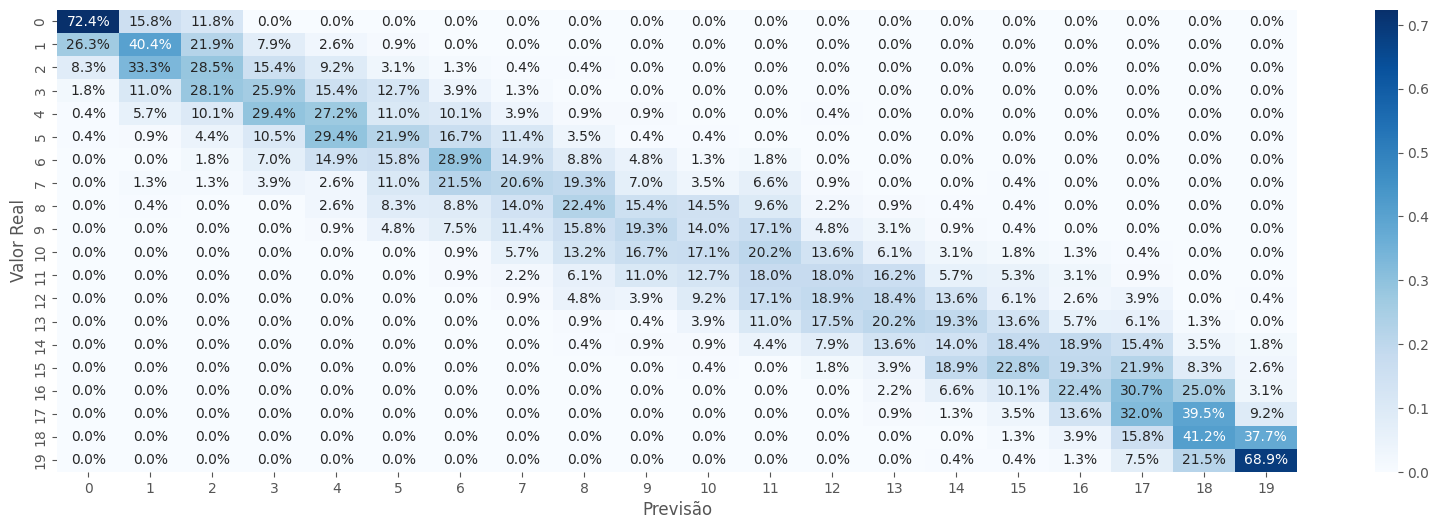

In [30]:
# Matrix de confusao
y_pred = best_model.predict(X_test)
matriz_confusao = confusion_matrix(y_test, y_pred)
total_por_classe = matriz_confusao.sum(axis=1)

divisor = np.where(total_por_classe[:, np.newaxis] == 0, 1, total_por_classe[:, np.newaxis])
if (total_por_classe == 0).any():
    # Tomar uma ação adequada, como atribuir um valor padrão
    matriz_confusao_percentual = np.where(divisor == 0, 0, matriz_confusao / divisor)
else:
    matriz_confusao_percentual = matriz_confusao / total_por_classe[:, np.newaxis]

plt.figure(figsize=(20, 6))
sns.heatmap(matriz_confusao_percentual, annot=True, fmt=".1%", cmap="Blues")
plt.xlabel('Previsão')
plt.ylabel('Valor Real')
plt.show()

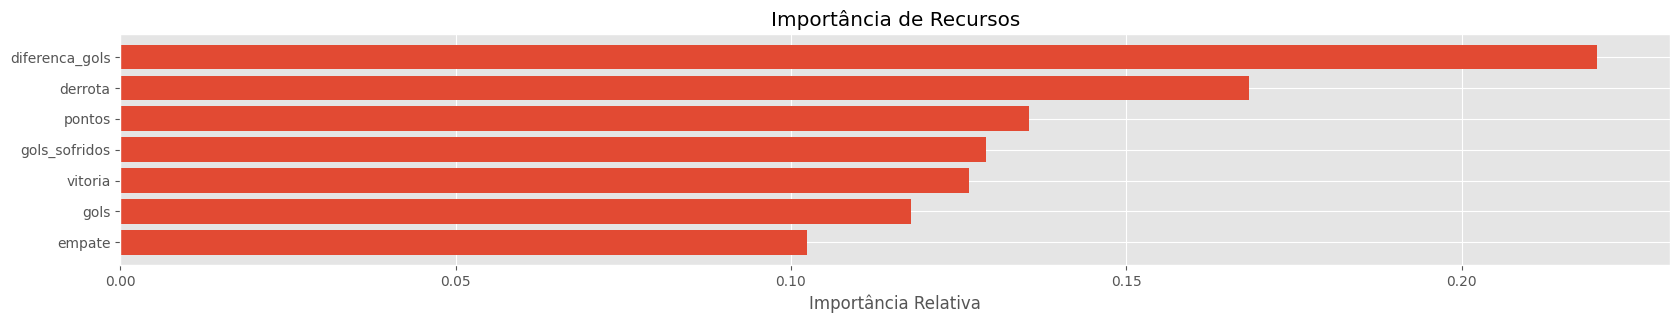

In [31]:
# Importancia das features
importancias = best_model.feature_importances_
nomes_recursos = np.array(features)
indices = np.argsort(importancias)

plt.title("Importância de Recursos")
plt.barh(range(len(indices)), importancias[indices], align='center')
plt.yticks(range(len(indices)), nomes_recursos[indices])
plt.xlabel('Importância Relativa')
plt.show()

#### Teste Unitário com dados de 2022 - rodada 27

In [32]:
seasons_test

[2008, 2014, 2022, 2010, 2012, 2011]

In [33]:
temporada = 2022
rodada = 27

# Predict
data_test_ano = dataset.query(f"temporada == {temporada} & rodada == {rodada}").copy()
data_test_ano['posicao_modelo'] = best_model.predict(data_test_ano[features])

# Probabilidade
y_pred_proba_test = best_model.predict_proba(data_test_ano[features])

df_proba = pd.DataFrame(y_pred_proba_test, columns = range(0, 20))
df_test_01 = pd.merge(data_test_ano.reset_index(drop=True), df_proba, left_index=True, right_index=True)

df_test_01['posicao_modelo'] = df_test_01['posicao_modelo']-1
df_test_01.sort_values('posicao_modelo', inplace=True)

df_centralized = pd.melt(df_test_01, id_vars=['time', 'posicao_modelo'], value_vars=df_proba.columns.tolist(),
                         var_name='classe', value_name='probabilidade')
df_centralized = df_centralized[df_centralized['posicao_modelo'] == df_centralized['classe']]
df_centralized['posicao_modelo'] = df_centralized['posicao_modelo'] + 1
df_centralized = pd.merge(df_centralized, 
                          data[data['rodada'] == data['ultima_rodada']].query(f"temporada == {temporada}")[['time', 'posicao', 'campeao']],
                          how='left', on=['time'])
df_centralized.drop(columns=['classe'], inplace=True)

In [34]:
df_centralized

,time,posicao_modelo,probabilidade,posicao,campeao
0,Palmeiras,1,0.615776,1,1.0
1,Internacional,1,0.223312,2,0.0
2,Fluminense RJ,3,0.321031,3,0.0
3,Flamengo RJ,3,0.259549,5,0.0
4,Corinthians SP,5,0.226425,4,0.0
5,Athletico Paranaense,5,0.180859,6,0.0
6,América - MG,8,0.283234,10,0.0
7,Santos FC,8,0.282220,12,0.0
8,Atlético Mineiro,9,0.277444,7,0.0
9,São Paulo FC,10,0.239190,9,0.0


### Prevendo o Campeao de 2023

In [35]:
# Predict
y_pred_temporada_atual = best_model.predict(current_season_data.query('rodada == 8')[features]).copy()
current_season_data_q = current_season_data.query('rodada == 8').copy()
current_season_data_q['posicao_modelo'] = y_pred_temporada_atual

# Probabilidade
y_pred_temporada_atual = best_model.predict_proba(current_season_data.query('rodada == 8')[features])
df_proba_2023 = pd.DataFrame(y_pred_temporada_atual, columns = range(0, 20))
df_previsao_2023 = pd.merge(current_season_data_q.reset_index(drop=True), df_proba_2023, left_index=True, right_index=True)

df_previsao_2023['posicao_modelo'] = df_previsao_2023['posicao_modelo']-1
df_previsao_2023.sort_values('posicao_modelo', inplace=True)

df_campeao = pd.melt(df_previsao_2023, id_vars=['time', 'posicao_modelo'], value_vars=df_proba_2023.columns.tolist(),
                         var_name='classe', value_name='probabilidade')
df_campeao = df_campeao[df_campeao['posicao_modelo'] == df_campeao['classe']]
df_campeao['posicao_modelo'] = df_campeao['posicao_modelo'] + 1

In [36]:
df_campeao.drop(columns='classe').head(5)

,time,posicao_modelo,probabilidade
0,Botafogo - RJ,1,0.639504
1,Palmeiras,1,0.543368
42,São Paulo FC,3,0.356771
63,Cruzeiro,4,0.260732
64,Fortaleza,4,0.213128


# Conclusão
Com base nas análises realizadas utilizando o modelo de previsão, chegamos a algumas conclusões interessantes sobre o Campeonato Brasileiro Série A 2023. Atualmente, com 8 rodadas disputadas, o modelo indica que o Botafogo tem uma probabilidade de 0.66 de terminar em primeiro lugar, e o Palmeiras com uma probabilidade de 0.52.

É importante ressaltar que essas probabilidades são baseadas nos dados disponíveis até o momento e podem mudar ao longo das próximas rodadas. À medida que mais jogos são disputados e mais informações são incorporadas ao modelo, é esperado que ele se torne mais preciso e as previsões sejam ajustadas.

Portanto, é interessante acompanhar o desenvolvimento do campeonato e observar como as equipes se saem nas próximas rodadas. O Botafogo e o Palmeiras estão demonstrando um desempenho promissor até o momento, mas ainda há muitas partidas a serem jogadas e a classificação final pode sofrer alterações.